In [1]:
from keras import backend
from keras.models import Sequential
import keras.layers as layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#================================================================================#
### mnist 데이터셋 로드 (28x28x1)###
#================================================================================#
from keras.datasets import mnist

backend.set_image_dim_ordering("tf")
(train_x_ori, train_y_ori), (test_x_ori, test_y_ori) = mnist.load_data()
train_x_ori = train_x_ori.astype('float32')
test_x_ori = test_x_ori.astype('float32')
train_x = train_x_ori / 255
test_x = test_x_ori / 255
train_x = train_x[:, :, :,np.newaxis,]
test_x = test_x[:, :, :, np.newaxis]

# y-label one-hot encoding
train_y = np_utils.to_categorical(train_y_ori, 10)
test_y = np_utils.to_categorical(test_y_ori, 10)

# Lenet input size(32x32x1)로 변환하기 위한 padding
train_x = np.pad(train_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
test_x = np.pad(test_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
print("Updated Image Shape: {}".format(train_x[0].shape))


#============================================================================================================================================#
### LeNet : conv1->(28x28x6)->pool1->(14x14x6)->conv2->(10x10x16)->pool2->(5x5x16)->fc1->(120x1)->fc2->(84x1)->fc3->(10x1)
#============================================================================================================================================#
# class LeNet : 
#     @staticmethod
#     def build(input_shape, classes):
#         model = Sequential()
#         model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=input_shape))
#         model.add(Activation("sigmoid"))
#         model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
#         model.add(Conv2D(50, kernel_size = 5, padding="same"))
#         model.add(Activation("sigmoid"))
#         model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
#         model.add(Flatten())
#         model.add(Dense(500))
#         model.add(Activation("sigmoid"))
#         model.add(Dense(10))
#         model.add(Activation("softmax"))
#         return model

model = Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(5,5), activation='sigmoid', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))      

model.add(layers.Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))      

model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='sigmoid'))
model.add(layers.Dense(units=84, activation='sigmoid'))
model.add(layers.Dense(units=10, activation='softmax'))

# print(model.summary())

#================================================================================#
### 학습
#================================================================================#
# model = LeNet.build(input_shape = (28, 28, 1), classes = 10)
steps_per_epoch = train_x.shape[0]//256
print(steps_per_epoch)
model.compile(loss = "categorical_crossentropy", optimizer=Adam(), metrics=["accuracy"])
history = model.fit(train_x, train_y, batch_size=256, epochs=10, verbose=1, validation_split=0.2)

# #================================================================================#
# ### 학습 결과 확인 
# #================================================================================#
# score = model.evaluate(test_x, test_y, verbose=1)
# print(model.summary())
score = model.evaluate(test_x, test_y)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarn

11493376/11490434 [==============================] - 3s 0us/step
Updated Image Shape: (32, 32, 1)
Instructions for updating:
Colocations handled automatically by placer.
234
Instructions for updating:
Use tf.cast instead.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 5s 112us/step - loss: 2.2365 - acc: 0.1926 - val_loss: 1.6134 - val_acc: 0.5671
Epoch 2/10
48000/48000 [==============================] - 5s 103us/step - loss: 0.8618 - acc: 0.7709 - val_loss: 0.4965 - val_acc: 0.8688
Epoch 3/10
48000/48000 [==============================] - 5s 112us/step - loss: 0.4195 - acc: 0.8816 - val_loss: 0.3234 - val_acc: 0.9083
Epoch 4/10
48000/48000 [==============================] - 5s 110us/step - loss: 0.3109 - acc: 0.9090 - val_loss: 0.2605 - val_acc: 0.9233
Epoch 5/10
48000/48000 [==============================] - 5s 104us/step - loss: 0.2560 - acc: 0.9231 - val_loss: 0.2211 - val_acc: 0.9351
Epoch 6/10
48000/48000 [==============

In [2]:
# #================================================================================#
# ### 중간층 결과 확인
# #================================================================================#

from keras.models import Model
from keras.layers  import Input

random_image = test_x[16]
h, w, c = random_image.shape
random_image = random_image.reshape(1, h, w, c)
print(random_image.shape)

cnn_layer_length = 4
cnn_layers = [layer for layer in model.layers[:cnn_layer_length]]

image_input = Input(shape=(32,32,1))

input_ = image_input
cnn_outputs = []

for i in range(len(cnn_layers)):
    layer = cnn_layers[i]
    output = layer(input_)
    cnn_outputs.append(output)
    input_ = output

activation_model = Model(image_input, cnn_outputs)    
activations = activation_model.predict(random_image)

for i in range(len(activations)):
    print(i, 'th activation output shape', activations[i].shape)
    print(' ')


(1, 32, 32, 1)
0 th activation output shape (1, 28, 28, 6)
 
1 th activation output shape (1, 14, 14, 6)
 
2 th activation output shape (1, 10, 10, 16)
 
3 th activation output shape (1, 5, 5, 16)
 


In [3]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_1 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_2 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_2 (Dense)              (None, 84)                10164     
__________

In [23]:
import cv2
def getChannelOutput(index, activations):
    title = model.layers[index].name
    act = activations[index]
    channels = act.shape[3]
#     print(channels)

    col = 1
    row = channels

    total_images = []

    for i in range(row):
        sub_images = []
        for j in range(col):
            sub_images.append(act[0, :, :, i+j])
        
        sub_image = cv2.hconcat(sub_images)
        total_images.append(sub_image)
        
    total_image = cv2.vconcat(total_images)
#     print(total_image)
#     print(total_image.shape)
#     plt.figure(figsize=(10,20))
#     plt.title(title, fontsize=15)
#     plt.imshow(total_image)
#     plt.show()
    return total_image


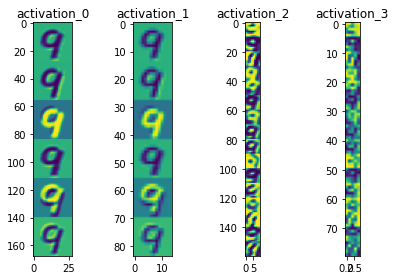

In [24]:
total = []
total.append(getChannelOutput(0, activations))
total.append(getChannelOutput(1, activations))
total.append(getChannelOutput(2, activations))
total.append(getChannelOutput(3, activations))

fig=plt.figure()
axes = []

for i in range(len(total)):
    axes.append(fig.add_subplot(1,len(total), i+1))
    axes[-1].set_title(f"activation_{i}")
    plt.imshow(total[i])
fig.tight_layout()
plt.show()

In [6]:
from keras import backend
from keras.models import Sequential
import keras.layers as layers
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers.core import Activation, Flatten, Dense
from keras.utils import np_utils
from keras.optimizers import SGD, RMSprop, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#================================================================================#
### mnist 데이터셋 로드 (28x28x1)###
#================================================================================#
# from keras.datasets import mnist

# backend.set_image_dim_ordering("tf")
# (train_x_ori, train_y_ori), (test_x_ori, test_y_ori) = mnist.load_data()
# train_x_ori = train_x_ori.astype('float32')
# test_x_ori = test_x_ori.astype('float32')
# train_x = train_x_ori / 255
# test_x = test_x_ori / 255
# train_x = train_x[:, :, :,np.newaxis,]
# test_x = test_x[:, :, :, np.newaxis]

# # y-label one-hot encoding
# train_y = np_utils.to_categorical(train_y_ori, 10)
# test_y = np_utils.to_categorical(test_y_ori, 10)

# # Lenet input size(32x32x1)로 변환하기 위한 padding
# train_x = np.pad(train_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# test_x = np.pad(test_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
# print("Updated Image Shape: {}".format(train_x[0].shape))


#============================================================================================================================================#
### LeNet : conv1->(28x28x6)->pool1->(14x14x6)->conv2->(10x10x16)->pool2->(5x5x16)->fc1->(120x1)->fc2->(84x1)->fc3->(10x1)
#============================================================================================================================================#
# class LeNet : 
#     @staticmethod
#     def build(input_shape, classes):
#         model = Sequential()
#         model.add(Conv2D(20, kernel_size = 5, padding="same", input_shape=input_shape))
#         model.add(Activation("sigmoid"))
#         model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
#         model.add(Conv2D(50, kernel_size = 5, padding="same"))
#         model.add(Activation("sigmoid"))
#         model.add(MaxPooling2D(pool_size = (2,2), strides = (2,2)))
#         model.add(Flatten())
#         model.add(Dense(500))
#         model.add(Activation("sigmoid"))
#         model.add(Dense(10))
#         model.add(Activation("softmax"))
#         return model

model = Sequential()
model.add(layers.Conv2D(filters=6, kernel_size=(5,5), activation='sigmoid', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))      

model.add(layers.Conv2D(filters=16, kernel_size=(5,5), activation='sigmoid'))
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2)))      

model.add(layers.Flatten())
model.add(layers.Dense(units=120, activation='sigmoid'))
model.add(layers.Dense(units=84, activation='sigmoid'))
model.add(layers.Dense(units=10, activation='softmax'))

print(model.summary())


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_3 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_4 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_5 (Dense)              (None, 84)                10164     
__________